# Matplotlibを使ったデータ可視化

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

'%.3f'

### 棒グラフ

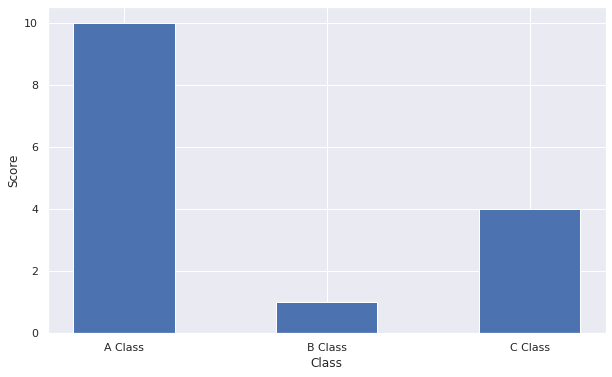

In [6]:
x = [1,2,3]
y = [10,1,4]
plt.figure(figsize=(10,6))
plt.bar(x,y,align='center',width=0.5)#棒グラフ
plt.xticks(x,['A Class','B Class','C Class'])
plt.xlabel('Class')
plt.ylabel('Score')
plt.grid(True)

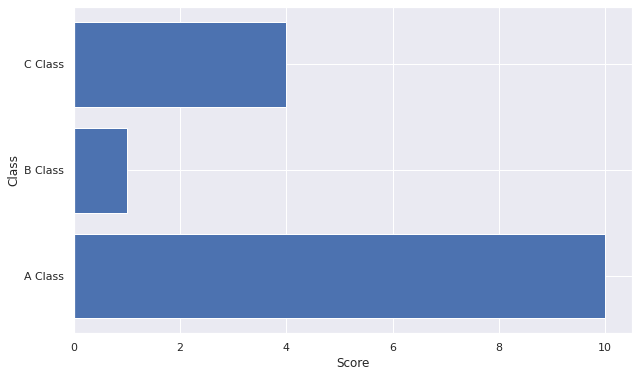

In [4]:
x = [1,2,3]
y = [10,1,4]
plt.figure(figsize=(10,6))
plt.barh(x,y,align='center',width=0.5)#横向き
plt.yticks(x,['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

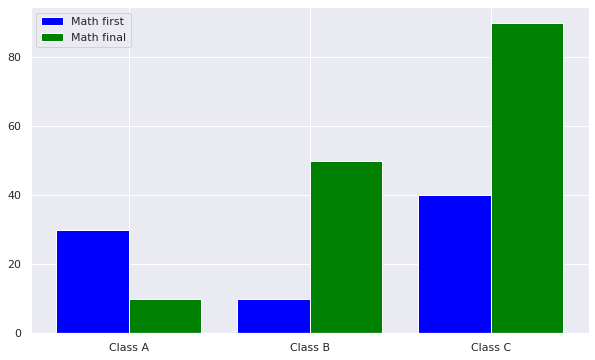

In [9]:
y1 = np.array([30,10,40])
y2 = np.array([10,50,90])
x = np.arange(len(y1))
w = 0.4
plt.figure(figsize=(10,6))
plt.bar(x,y1,color = 'blue',width = w,label = 'Math first',align='center')
plt.bar(x+w,y2,color='green',width = w, label = 'Math final', align = 'center')#複数グラフ
plt.legend(loc='best')
plt.xticks(x+w/2,['Class A','Class B','Class C'])
plt.grid(True)

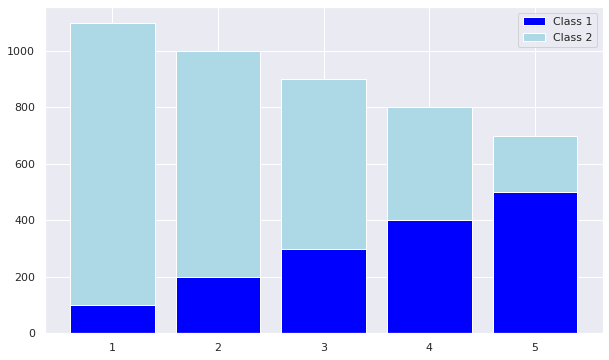

In [11]:
height1 = np.array([100,200,300,400,500])
height2 = np.array([1000,800,600,400,200])
x = np.array([1,2,3,4,5])
plt.figure(figsize=(10,6))
p1=plt.bar(x,height1,color='blue')
p2=plt.bar(x,height2,bottom=height1,color='lightblue')#重ね棒グラフ
plt.legend((p1[0],p2[0]),('Class 1','Class 2'))

### 円グラフ

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

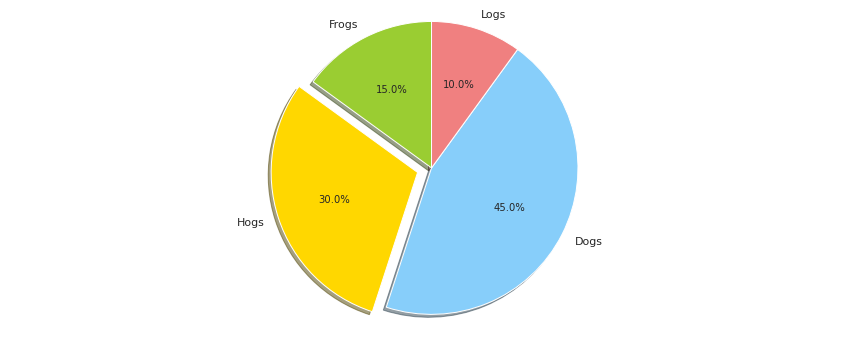

In [12]:
labels = ['Frogs','Hogs','Dogs','Logs']
sizes = [15,30,45,10]
colors = ['yellowgreen','gold','lightskyblue','lightcoral']
explode = (0,0.1,0,0)
plt.figure(figsize=(15,6))
plt.pie(sizes,explode = explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)#円グラフ
plt.axis('equal')

### バブルチャート

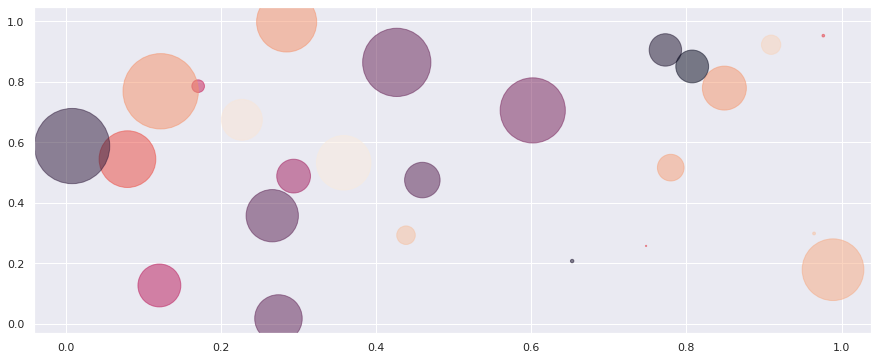

In [16]:
N=25
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = 10*np.pi*(15*np.random.rand(N))**2
plt.figure(figsize=(15,6))
plt.scatter(x,y,s = area,c = colors,alpha=0.5)
plt.grid(True)

In [21]:
#練習問題
student_mat = pd.read_csv('./chap3/student-mat.csv',sep=';')
student_mat.reason

0      course
1      course
2       other
3        home
4        home
        ...  
390    course
391    course
392    course
393    course
394    course
Name: reason, Length: 395, dtype: object

In [22]:
student_mat.groupby('reason').size()

reason
course        145
home          109
other          36
reputation    105
dtype: int64

<AxesSubplot:ylabel='None'>

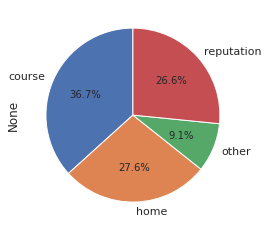

In [23]:
student_mat.groupby('reason').size().plot(kind='pie',autopct='%1.1f%%',startangle=90)

(-1.1193776980870564,
 1.1102745524399802,
 -1.1043131643562698,
 1.1002054024801953)

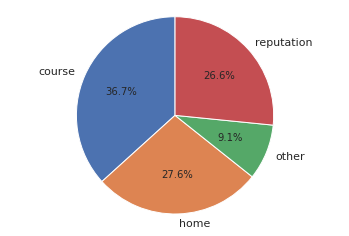

In [25]:
student_mat.groupby('reason').size().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.ylabel('')
plt.axis('equal')

<AxesSubplot:xlabel='higher'>

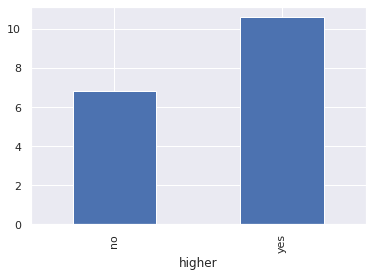

In [39]:
student_mat.groupby('higher')['G3'].mean().plot(kind='bar')

TypeError: 'str' object is not callable

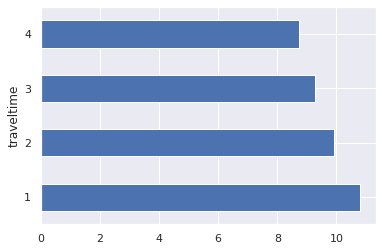

In [44]:
student_mat.groupby('traveltime')['G3'].mean().plot(kind='barh')
plt.xlabel('G3 score')

### 応用：金融データの可視化

In [46]:
idx = pd.date_range('2015/01/01','2015/12/31 23:59',freq='T')
dn = np.random.randint(2,size=len(idx))*2-1
rnd_walk = np.cumprod(np.exp(dn*0.0002))*100
df = pd.Series(rnd_walk,index=idx).resample('B').ohlc()

<AxesSubplot:>

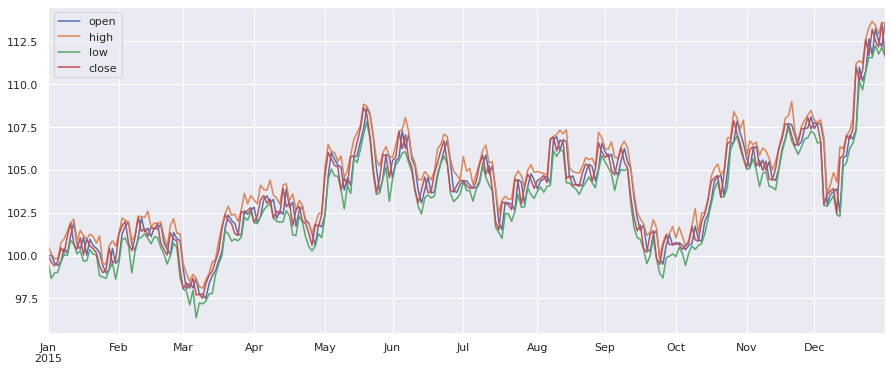

In [47]:
df.plot(figsize=(15,6),legend='best',grid=True)

In [48]:
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF
init_notebook_mode(connected=True)
fig = FF.create_cand1estick(df.open,df.high,df.low,df.close,dates=df.index)
iplot(fig)

AttributeError: module 'plotly.figure_factory' has no attribute 'create_cand1estick'

In [ ]:
#総合問題